In [1]:
import pandas as pd
import numpy as np
import pyodbc
import pandas.core.algorithms as algos
import getpass
from sklearn import metrics as met
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib
import datetime
#import ipywidgets as widgets
import sys
#sys.path.append('C:/YandexDisk/Work/RevoBigScorring/')
sys.path.append('/home/messiah49/Yandex.Disk/Work/RevoBigScorring/')
import scoringfunctions as sf
import woe
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7
pd.options.mode.chained_assignment = None

badFlag = 'badMob3'

import imp
sf = imp.reload(sf)
woe = imp.reload(woe)

In [2]:
dfSrc = pd.read_csv('Result_20160516.csv',sep='\t').rename(columns={'ID':'clientKey'})
#bFlags = pd.read_csv('C:/YandexDisk/Work/Useful/BadFlags/badFlags.csv')
bFlags = pd.read_csv('/home/messiah49/Yandex.Disk/Work/Useful/BadFlags/badFlags.csv')
dfSrcBadFlags = pd.merge(dfSrc,bFlags,on='clientKey',how='left')

In [3]:
coltypes = dfSrcBadFlags.dtypes.to_frame()
objCol = coltypes[coltypes[0]=='object'].index
dfSrcBadFlags[objCol] = dfSrcBadFlags[objCol].replace('-',np.nan)

dfSrcBadFlags.MaxRegDate = pd.to_datetime(dfSrcBadFlags.MaxRegDate)
dfSrcBadFlags.MinRegDate = pd.to_datetime(dfSrcBadFlags.MinRegDate)
dfSrcBadFlags.RetroTestDate = pd.to_datetime(dfSrcBadFlags.RetroTestDate)

dfSrcBadFlags['minDateDays'] = (dfSrcBadFlags.RetroTestDate - dfSrcBadFlags.MinRegDate).dt.days
dfSrcBadFlags['maxDateDays'] = (dfSrcBadFlags.RetroTestDate - dfSrcBadFlags.MaxRegDate).dt.days

dfSrcBadFlags = dfSrcBadFlags.drop(['MaxRegDate','MinRegDate','RetroTestDate','Interests'],axis=1)

dfSrcBadFlags = dfSrcBadFlags.astype(float)

In [44]:
scoringVars = ['SaScoreFraud','SaScore1','SaScore2','SaScoreSocial']

In [45]:
dfLoans = dfSrcBadFlags[dfSrcBadFlags.badMob3.notnull()]
dfPreClust = dfLoans.drop(['clientKey','badFpd']+scoringVars,axis=1)
dfFirstPreWoe,clustInfo = sf.continuousVariables(dfPreClust,20)
dfFirstPostWoe, woeInfo = sf.woeVariables(dfFirstPreWoe,badFlag,minBadRateDiff=0.006)

Progress: 2.2%, 4.3%, 6.5%, 8.7%, 10.9%, 13.0%, 15.2%, 17.4%, 19.6%, 21.7%, 23.9%, 26.1%, 28.3%, 30.4%, 32.6%, 34.8%, 37.0%, 39.1%, 41.3%, 43.5%, 45.7%, 47.8%, 50.0%, 52.2%, 54.3%, 56.5%, 58.7%, 60.9%, 63.0%, 65.2%, 67.4%, 69.6%, 71.7%, 73.9%, 76.1%, 78.3%, 80.4%, 82.6%, 84.8%, 87.0%, 89.1%, 91.3%, 93.5%, 95.7%, 97.8%, 100.0%, 


/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


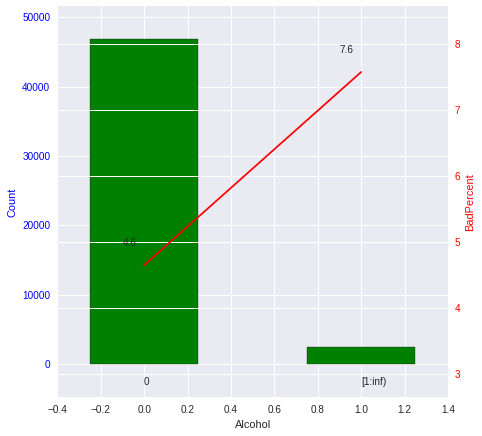

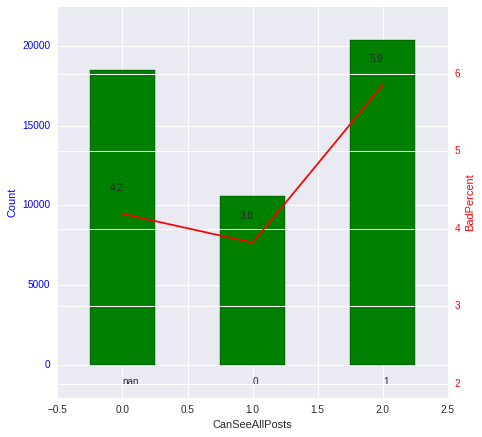

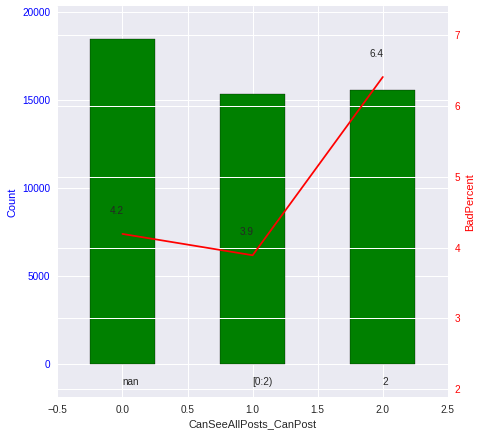

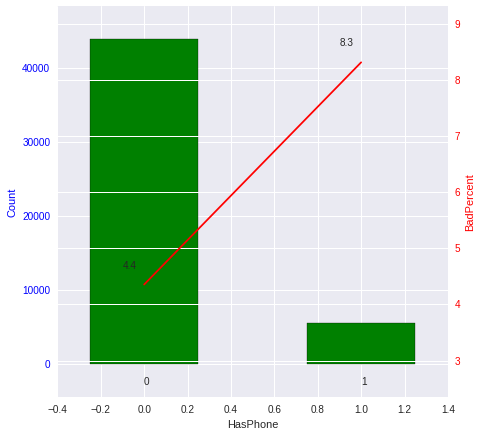

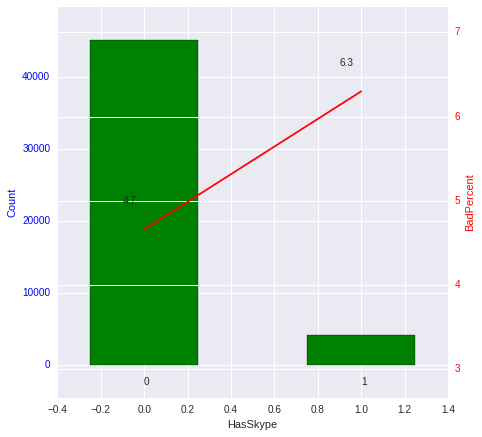

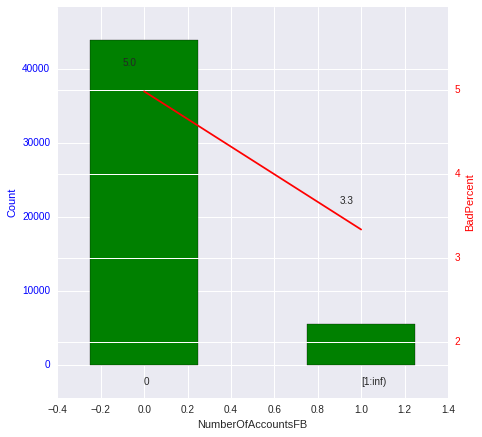

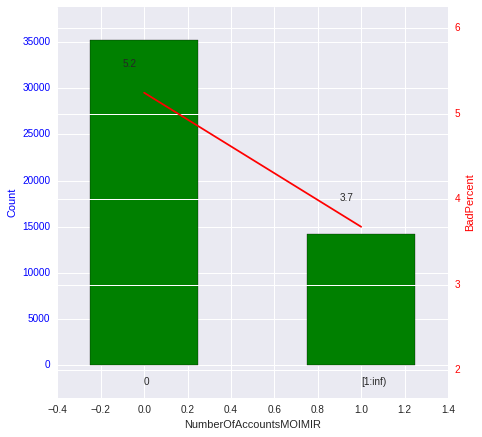

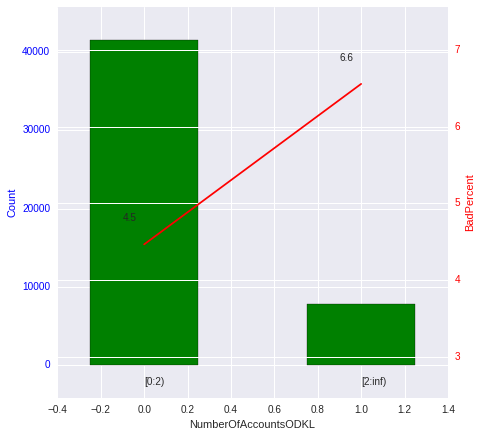

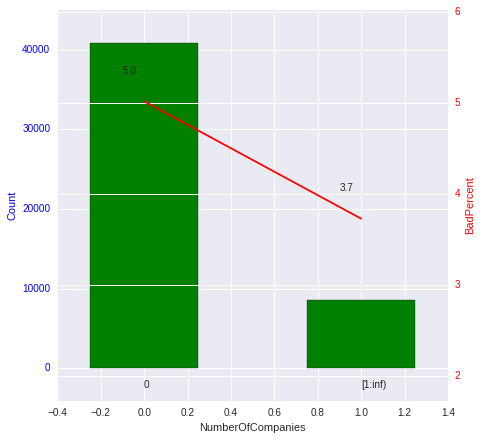

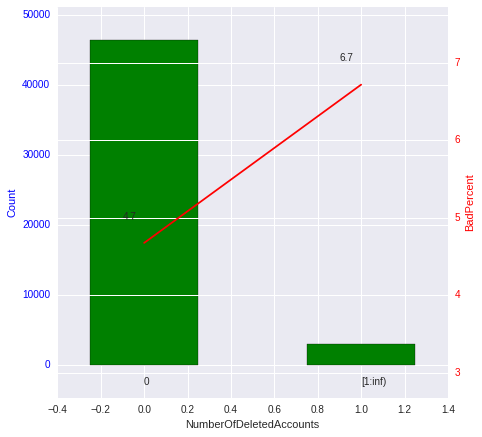

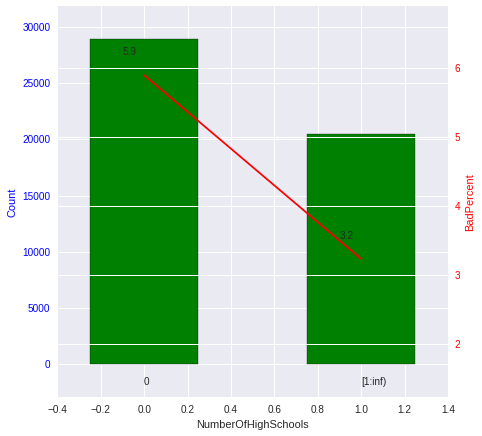

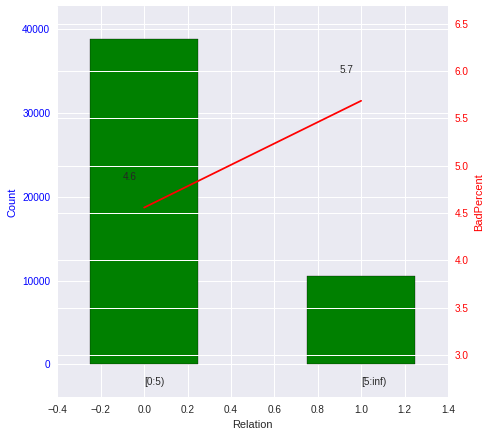

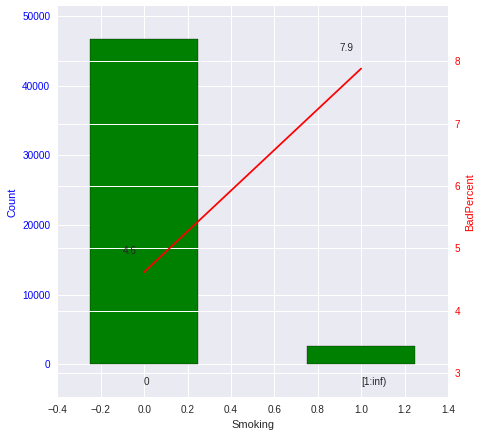

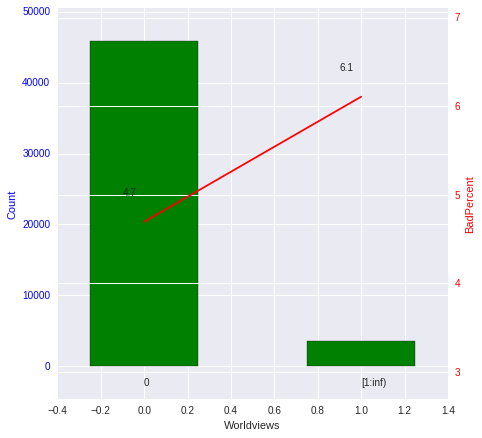

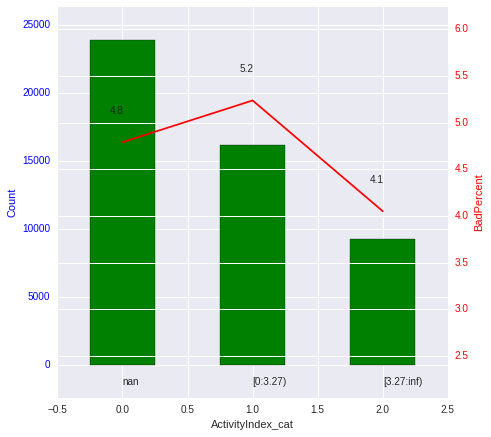

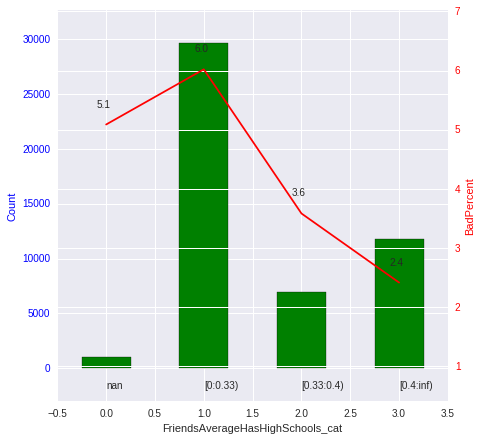

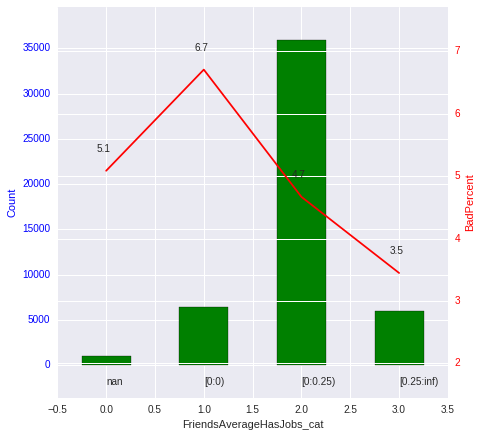

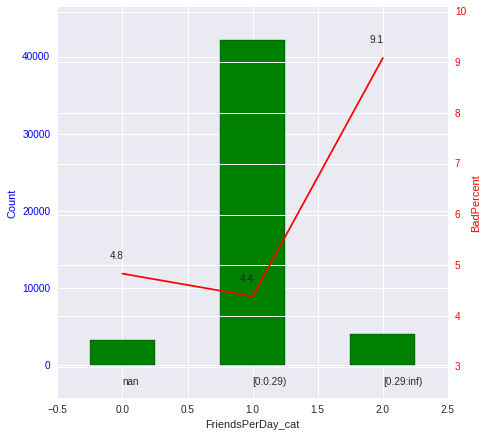

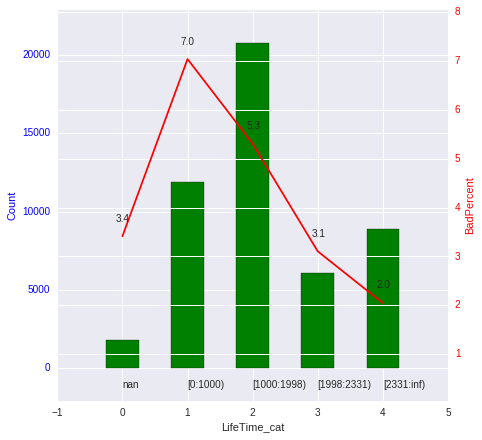

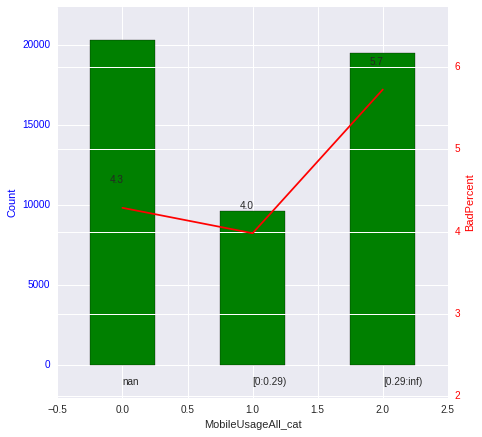

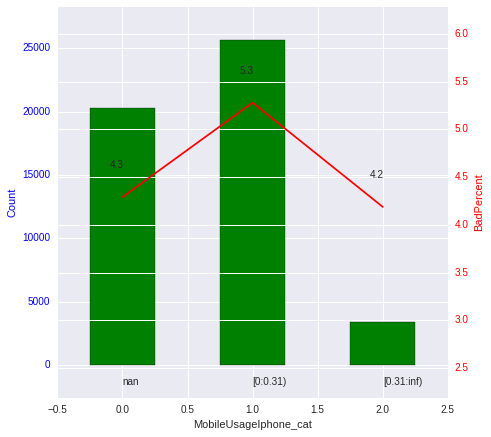

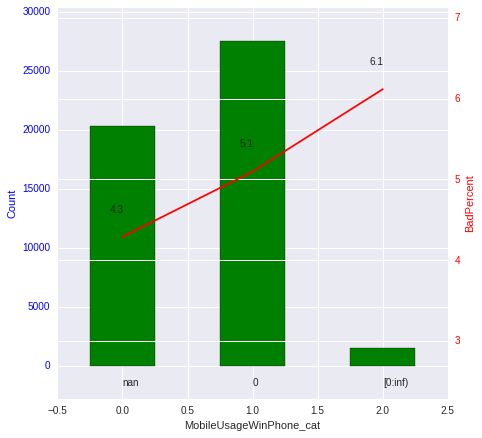

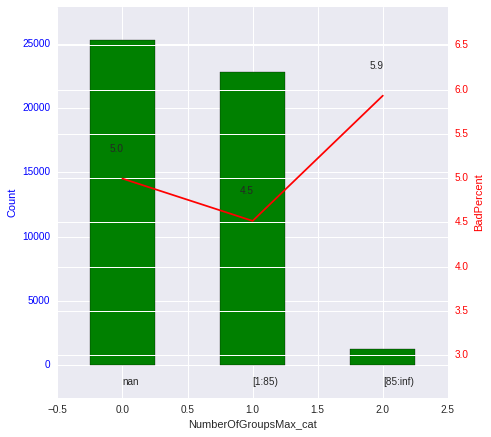

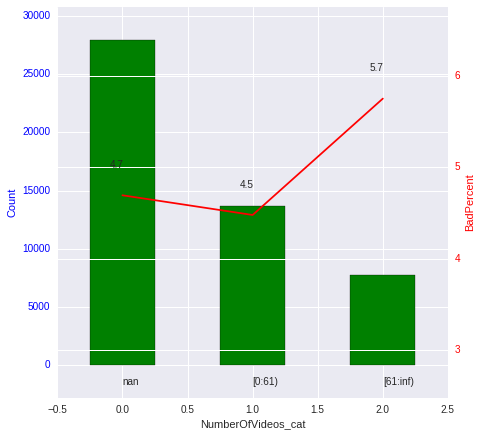

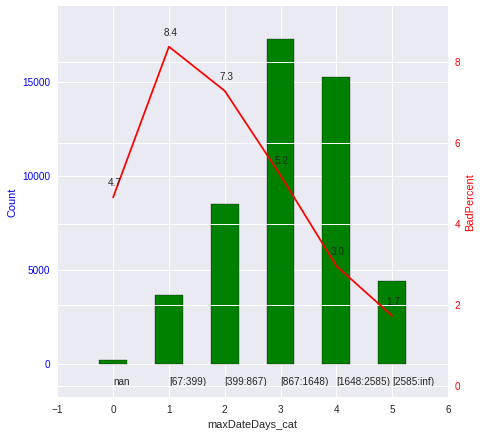

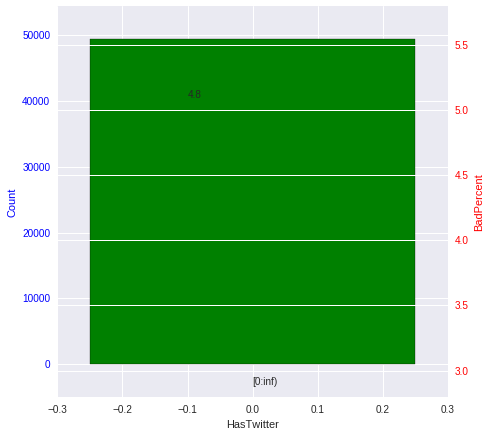

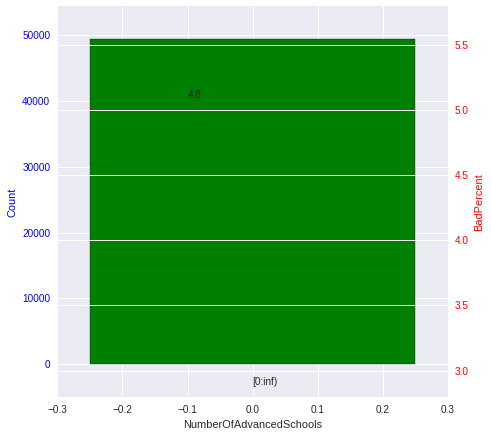

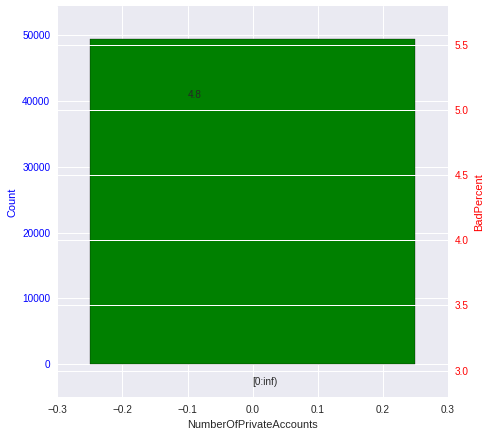

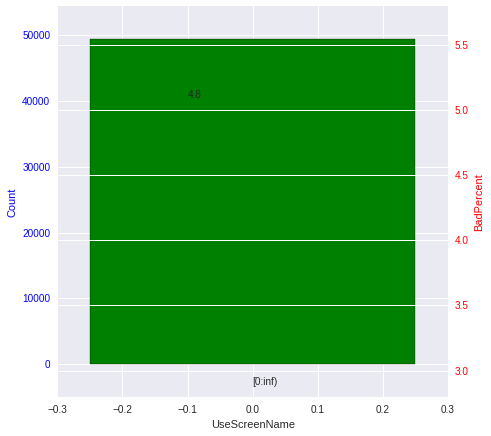

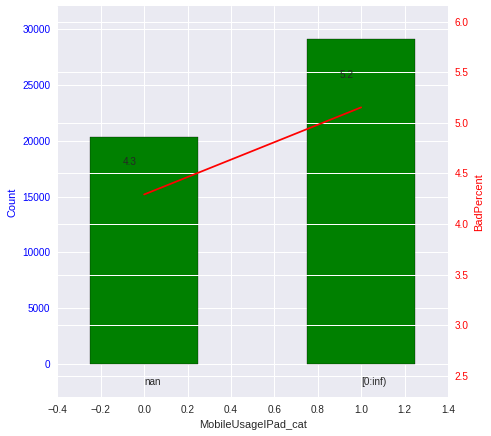

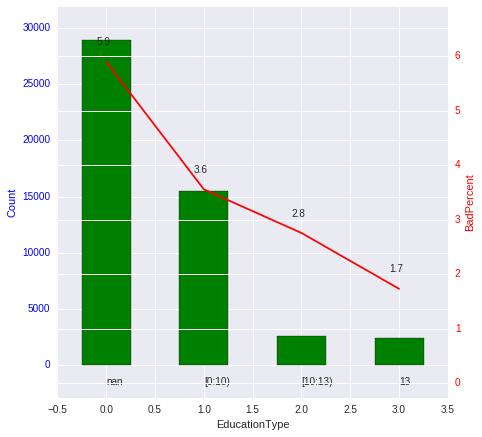

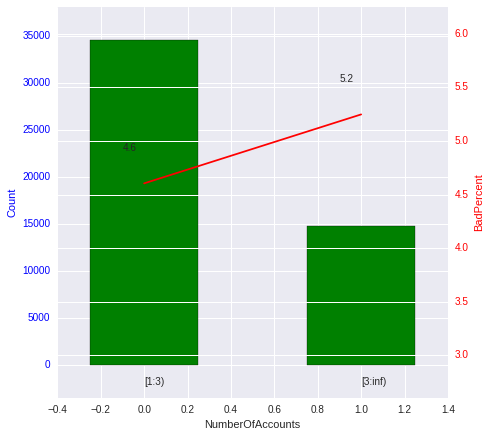

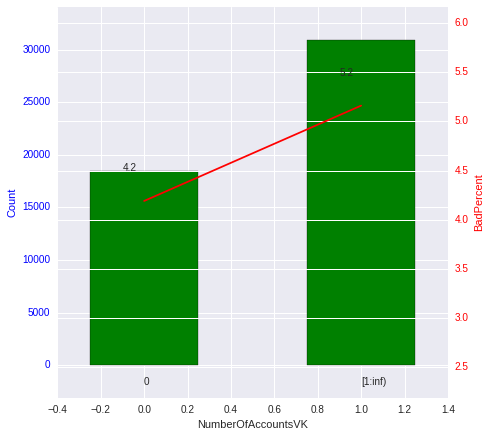

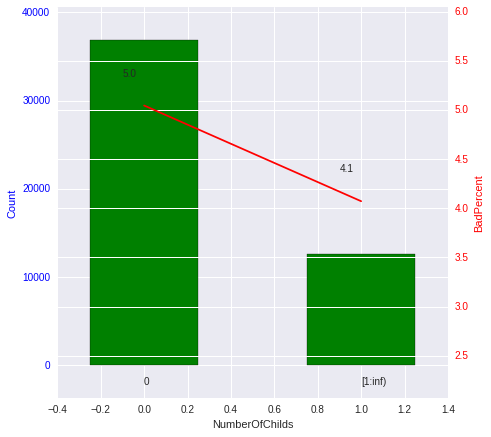

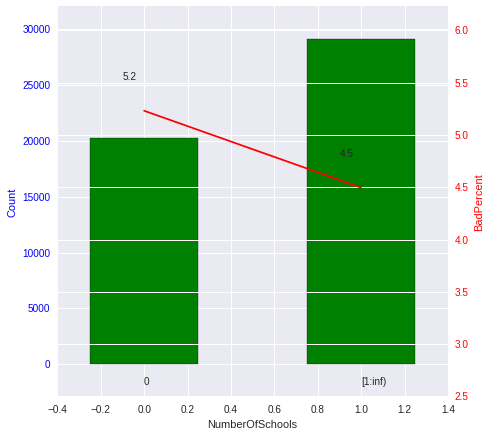

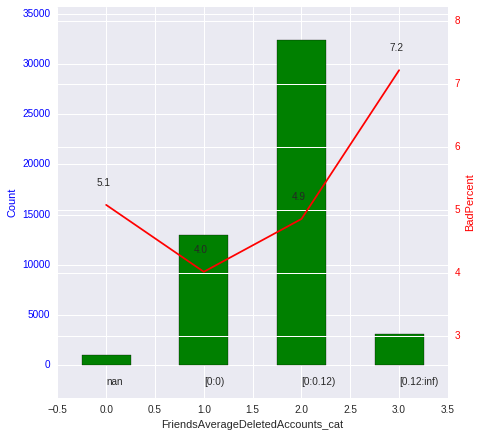

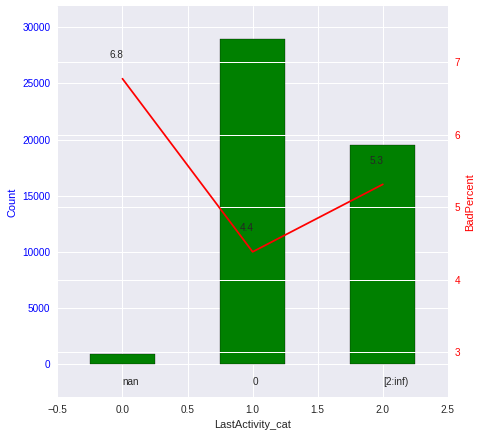

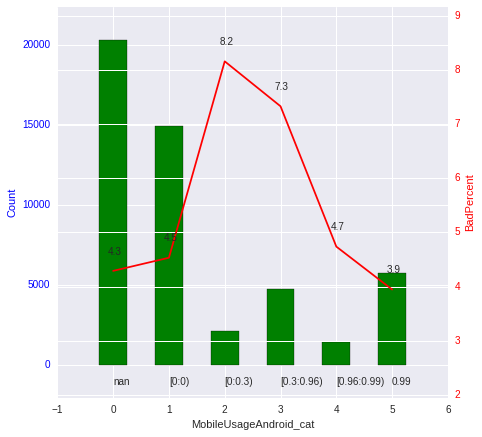

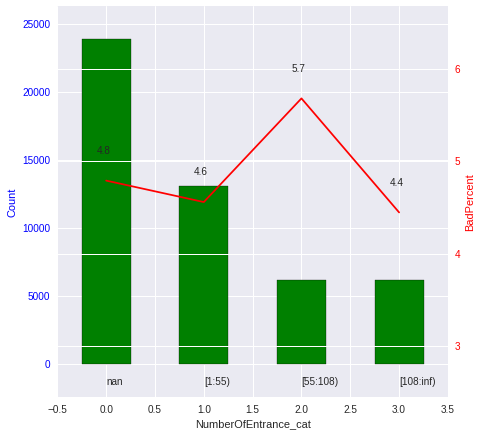

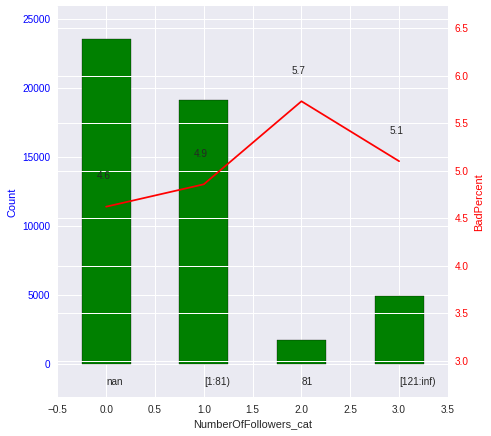

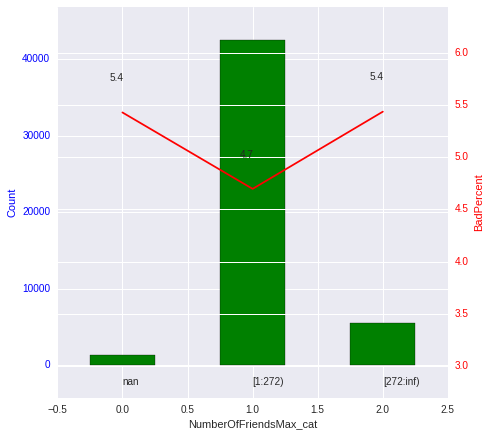

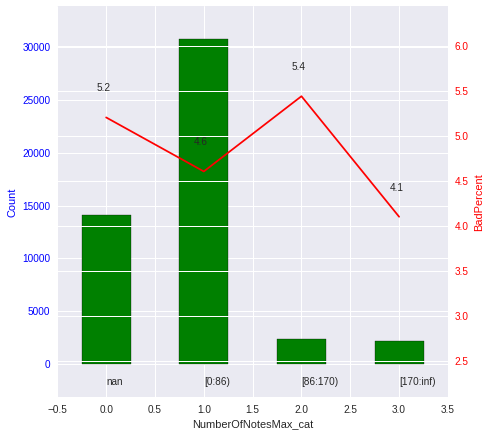

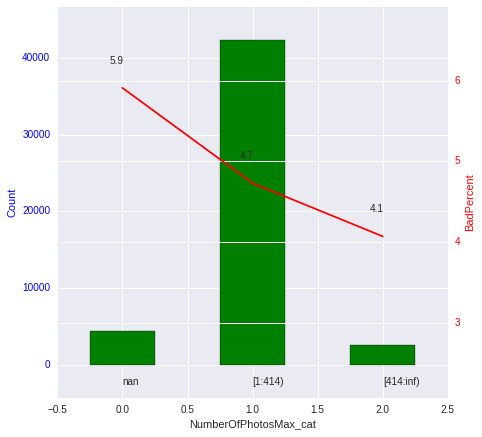

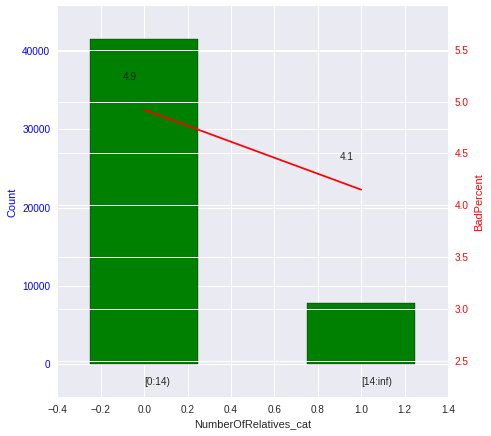

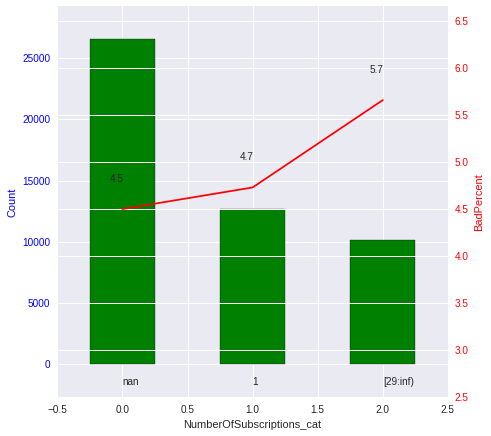

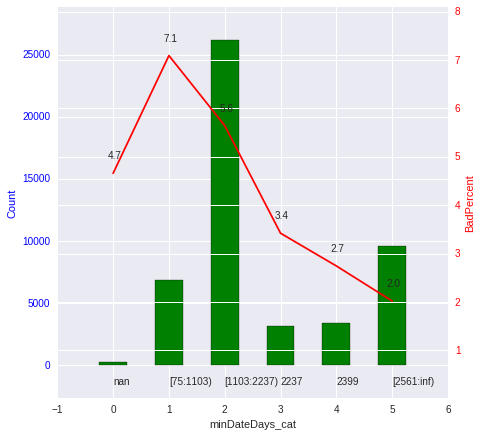

In [46]:
woe.twinPlotWoe(woeInfo)

In [50]:
woeInfo.variable.unique()

array(['Alcohol', 'CanSeeAllPosts', 'CanSeeAllPosts_CanPost',
       'EducationType', 'HasPhone', 'HasSkype', 'HasTwitter',
       'NumberOfAccounts', 'NumberOfAccountsFB', 'NumberOfAccountsMOIMIR',
       'NumberOfAccountsODKL', 'NumberOfAccountsVK',
       'NumberOfAdvancedSchools', 'NumberOfChilds', 'NumberOfCompanies',
       'NumberOfDeletedAccounts', 'NumberOfHighSchools',
       'NumberOfPrivateAccounts', 'NumberOfSchools', 'Relation', 'Smoking',
       'UseScreenName', 'Worldviews', 'badFpd', 'ActivityIndex_cat',
       'FriendsAverageDeletedAccounts_cat',
       'FriendsAverageHasHighSchools_cat', 'FriendsAverageHasJobs_cat',
       'FriendsPerDay_cat', 'LastActivity_cat', 'LifeTime_cat',
       'MobileUsageAll_cat', 'MobileUsageAndroid_cat',
       'MobileUsageIPad_cat', 'MobileUsageIphone_cat',
       'MobileUsageWinPhone_cat', 'NumberOfEntrance_cat',
       'NumberOfFollowers_cat', 'NumberOfFriendsMax_cat',
       'NumberOfGroupsMax_cat', 'NumberOfNotesMax_cat',
       'Num

In [35]:
newPositions = { 'MobileUsageAndroid_cat':[0,1,2],
                'NumberOfEntrance_cat':[0],
                'NumberOfFollowers_cat':[0,1,2],
                'NumberOfNotesMax_cat':[0],
                'minDateDays_cat':[0,1,2,3,5]                
                }/home/messiah49/Yandex.Disk

In [47]:
woeInfoTrans = woe.transformWoeVarsInfo(woeInfo,newPositions)
postWoeTransform = sf.getWOEcolumnAfterTransform(dfFirstPreWoe,woeInfoTrans)

In [48]:
informationTable = sf.giniGrowth(postWoeTransform, woeInfoTrans, badFlag)

In [49]:
informationTable#.to_csv('doubleIV.csv',index=False)

,variable,informationValue,testDiff,trainDiff,giniTest,giniTrain
40,maxDateDays_cat_WOE,0.204519,0.235941,2.437027e-01,0.235941,0.243703
44,minDateDays_cat_WOE,0.174291,0.037169,3.153932e-02,0.273110,0.275242
29,LifeTime_cat_WOE,0.172870,0.009568,1.281322e-02,0.282678,0.288055
25,FriendsAverageHasHighSchools_cat_WOE,0.138625,0.016398,3.688041e-02,0.299077,0.324936
3,EducationType_WOE,0.105438,0.012438,8.254617e-03,0.311515,0.333190
16,NumberOfHighSchools_WOE,0.089027,0.000134,9.217057e-04,0.311649,0.334112
4,HasPhone_WOE,0.059452,0.020107,2.085694e-02,0.331756,0.354969
27,FriendsPerDay_cat_WOE,0.059069,0.003843,8.987579e-03,0.335599,0.363956
2,CanSeeAllPosts_CanPost_WOE,0.054694,0.003541,-1.033254e-03,0.339140,0.362923
1,CanSeeAllPosts_WOE,0.037987,0.000793,-9.611761e-05,0.339933,0.362827


In [50]:
goodColumns= list(informationTable[informationTable['testDiff']>0.002].variable.values) + [badFlag]
badCols = list(informationTable[informationTable['testDiff']<=0.002].variable.values) 
#goodColumns = [x for x in goodColumns if x!='ScoringScore_cat_WOE']

preLR = dfFirstPostWoe[goodColumns]

In [51]:
c1,c2 = sf.corrTable(preLR,informationTable)

In [52]:
c1

,var1,var2,r^2
0,minDateDays_cat_WOE,LifeTime_cat_WOE,0.814626


In [53]:
badCorColumns = ['LifeTime_cat_WOE'] + scoringVars
goodColumns = [x for x in goodColumns if x not in badCorColumns]
preLR = dfFirstPostWoe[goodColumns]

In [54]:
for col in goodColumns:
    print (sf.preClean(col))

maxDateDays
minDateDays
FriendsAverageHasHighSchools
EducationType
HasPhone
FriendsPerDay
CanSeeAllPosts_CanPost
FriendsAverageHasJobs
MobileUsageAll
FriendsAverageDeletedAccounts
LastActivity
NumberOfAccountsVK
NumberOfChilds
NumberOfVideos
NumberOfRelatives
badMob3


------------------------------------------------------------
train:


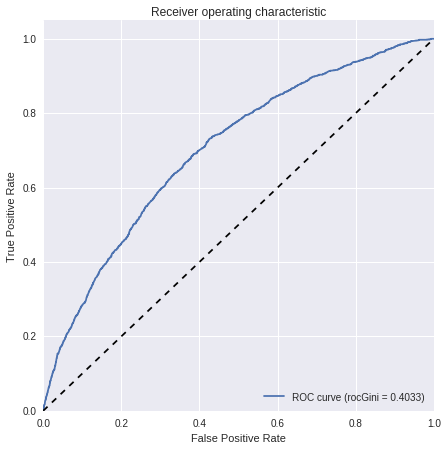

------------------------------------------------------------
test:


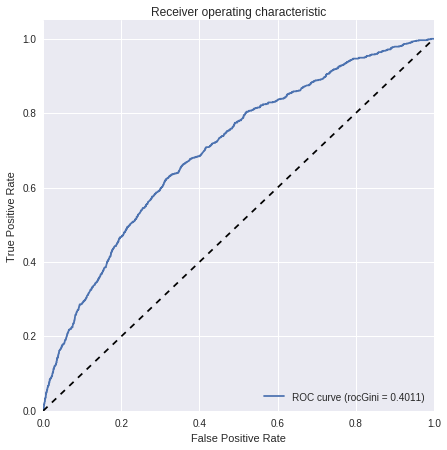

In [55]:
preLR = dfFirstPostWoe[goodColumns]

y = preLR[badFlag].values

preLRvar = preLR.drop(badFlag,axis=1)

X = preLRvar.values
clmn = list(preLRvar.columns)
fi = sf.featureImportance(X,y,clmn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 4)
lr = LogisticRegression(C=0.1)
lr.fit(X_train,y_train)
pr_test = lr.predict_proba(X_test)[:,1]
pr_train = lr.predict_proba(X_train)[:,1]

print('-'*60)
print("train:")
sf.rocCurve(y_train,pr_train)
print('-'*60)
print("test:")
sf.rocCurve(y_test,pr_test)


In [57]:
from math import log
factor = 20 / log(2)
offset = 600 - (factor*log(50))

intercept = -(lr.intercept_/len(lr.coef_[0]))*factor + offset/len(lr.coef_[0])
intercept = intercept[0]*len(lr.coef_[0])
intercept

573.2098394162316

In [58]:
lr.coef_

array([[ 0.00589081,  0.00394416,  0.00632836,  0.00585655,  0.00676474,
         0.00518875,  0.00247841,  0.00641011,  0.01055725,  0.01022882,
         0.0134411 ,  0.0081453 ,  0.01411015,  0.01364419,  0.01136458]])

In [61]:
woeOut = sf.woeOutput(woeInfoTrans,goodColumns,lr.coef_,factor)

In [63]:
woeProd = sf.woeProduction(woeOut)

In [69]:
woeProd.replace(100000000.00000,'inf').fillna('nan').to_csv('DDmodelDescription.csv',index=False)